In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **PCA USANDO PYTHON (SCIKIT-LEARN)**

+ Una forma de acelerar la instalación de un algoritmo de ML es cambiando el algoritmo de optimiazación que se puede conseguir mediante el análisis de componentes principales (PCA). Si su algoritmo de ML es demasiado lento porque la dimensión de entrada es demasiado grande, usar PCA para acelerarlo puede ser una opción razonable.





## **PCA PARA VISUALIZACIÓN DE DATOS**

Para muchoas aplicaciones de ML, es útil poder visualizar datos y reducir la dimensionalidad no es tan desafiante. Nuestro Dataset tiene 4 dimensiones y vamos a reducir los datos a 2 o 3 dimensiones con el objetivo de que el algoritmo pueda comprender mejor los datos.




In [ ]:
# Load CSV

data = pd.read_csv('/content/drive/MyDrive/IT Academy - Data Science/ Sprint 9 - Correlation, Feature Scaling & Feature Engineering/Practise/Data/Iris.csv')
data = data.drop(columns='Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### **ESTANDARIZAR LOS DATOS**

PCA se aplica por escala, por lo que debemos escalar las variables antes de aplica PCA. Usar **STANDARDSCALE** puede ayudarnos a estanzarizar las variables del conjunto de datos en escala unitaria (media = 0 y SD = 1). Este es un requisito para el rendimiento óptimo de muchos algoritmos de ML.

In [ ]:
# Estandarizar los datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = ['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Filtrar (separate out) las variables
x = data.loc[:, features].values # Array

# Filtrar (separate out) Species (variables con datos)
y = data.loc[:, ['Species']].values

# Estandarizacion de las variables

x = scaler.fit_transform(x)


### **PROYECCIÓN PCA A 2 DIMENSIONES**

+ Los datos originales tienen 4 variable (longitud del sépalo, anchura del sépalo, longitud del pétalo y anchura del pétalo). Cabe destacar que cuando reducimos de dimension de 4 a 2, dicha reducción no asigna un significado particular a cada componente princial. Los nuevos componentes son solo las dos dimensiones principales de la variación.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

# Convert to DF

principalDf = pd.DataFrame(data = principalComponents, columns=['PCA1', 'PCA2'])
principalDf.head()

,PCA1,PCA2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
# Añadimos la columna categorica al DF

finalDf = pd.concat([principalDf, data[['Species']]], axis = 1)
finalDf.head()

,PCA1,PCA2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


### **VISUALIZAR PROYECCIÓN 2D**

+ Mira como las variables parecen estar bien separadas entre sí.

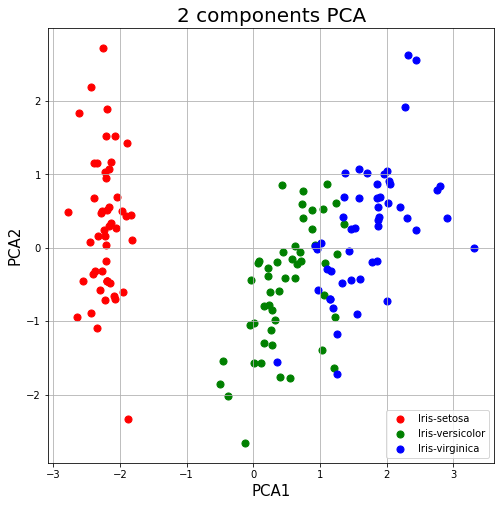

In [ ]:
# Visualización

#FRAMEWORK
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)

# DATA

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r','g','b']
for specie, color in zip(species, colors):
  indexestoKeep = finalDf['Species'] == specie
  ax.scatter(finalDf.loc[indexestoKeep, 'PCA1']
             , finalDf.loc[indexestoKeep, 'PCA2']
             , c = color
             , s = 50)
  ax.legend(species)
  ax.grid()

In [ ]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### **LA VARIANZA EXPLICADA**

+ La varianza explicada le indica cuánta información (varianza) se puede atribuir a cada uno de los componentes principales. Esto es importante ya que, si bien puede convertir un espacio de 4D a 2D, pierde parte de la varianza (información) cuando hace esto. 

+ Al usar la variable **added_variance_ratio_**, puede ver que el primer PCA contiene el 72,77% de la varianza y el segundo PCA contiene el 23,03% de la varianza. Juntos suan el 95,80% de la información.


In [ ]:
# VARIANZA DE LOS PCA

pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

## **PCA PARA ACELERAR LOS ALGORITMOS DE ML**

Para llevar a cabo la introducción de PCA a los algoritmos de ML usaremos una BBDD con 784 variables con un conjunto de entrenamiento de 60.000 observaciones y un conjunto de prueba de 10.000 observaciones.

In [ ]:
# Load the DATA
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

+ Las imágenes descargadas estan en **mnist.data** y tienen una forma (70000,784), lo que significa que hay 70000 imágenes con 784 diminesiones (784 variables).

+ Las etiquetas (los números enteros del 0-9) estan contenidas en **mnist.target**. Las variables tienen 784 variables (imágenes de 28x28) y las etiquetas son simplemente números del 0 al 9.


In [ ]:
# Dividir datos de entrenamiento (80%) y de prueba (20%)
# En este caso elegimos 6/7 de los datos para entrenar y 1/7 de prueba

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(mnist.data, mnist.target, test_size = 1/7.0, random_state = 0)

In [ ]:
# Estandarizamos los datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitteamos solo el conjunto de datos de entrenamiento
scaler.fit(train_X)

# Estandarizamos tanto los datos de entrenamiento como los de prueba
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [ ]:
# Aplicamos el PCA

# Nosotros le pedimos que mantenga el 95% de la varianza y luego Scikit-learn
# quien elige la cantidad mínima de PCA.

from sklearn.decomposition import PCA

pca = PCA(.95) # Hacemos una intancia del modelo

# Hacemos el fit SOLO del conjunto de datos de entrenamiento
pca.fit(train_X)

PCA(n_components=0.95)

In [ ]:
# Podemos averiguar cuantos PCA se han elegido para nuestro modelo

pca.n_components_ # Para mantener un 95% de la varianza se han necesitado 330 columnas

327

In [ ]:
# Transformamos tanto el conjunto de datos de entrenamiento como de prueba

train_X = pca.transform(train_X)
test_X = pca.transform(test_X)

### **APLICAMOS LA REGRESION LOGISTICA A LOS DATOS TRANSFORMADOS**

**PASO 1:** IMPORTAR EL MODELO QUE QUEREMOS USAR


In [ ]:
# En sklearn, todos los modelos de ML se implementan como clases de python

from sklearn.linear_model import LogisticRegression


**PASO 2:** CREAR UNA INSTANCIA DEL MODELO

In [ ]:
# Solver = el solver predeterminado es muy lento, por lo que se usa el 'lbfgs'
# Todos los parámetros no especificados se establecen en sus valores
logisRegression = LogisticRegression(solver='lbfgs')

**PASO 3:** ENTRENAR EL MODELO CON LOS DATOS, ALMACENAR LA INFORMACIÓN APRENDIDA DE LOS DATOS



In [ ]:
# El modelo esta aprendiendo la relación entre los números y las etiquetas

logisRegression.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**PASO 4:** Predecir las etiquetas de nuevos datos (nuevas imágenes)

Usamos la información que el modelo aprendió durante el proceso de entrenamiento del modelo


In [ ]:
# Predicción para una observacion [0] de los datos de prueba

logisRegression.predict(test_X[0].reshape(1,-1) )

array(['0'], dtype=object)

In [ ]:
# predicción de las 10 primeras observaciones de los datos de prueba
logisRegression.predict(test_X[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

### **MEDICIÓN DEL RENDIMIENTO DEL MODELO**

Si bien las precisión no siempre es la mejor métrica para los algoritmos de ML usaremos el 'score'

In [ ]:
# Medimos la precisión del modelo con los datos y etiquetas de prueba
logisRegression.score(test_X, test_Y)

0.9201

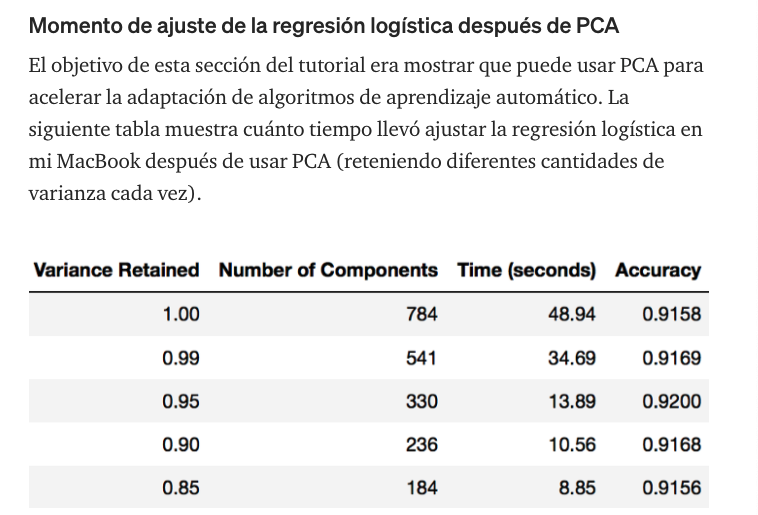

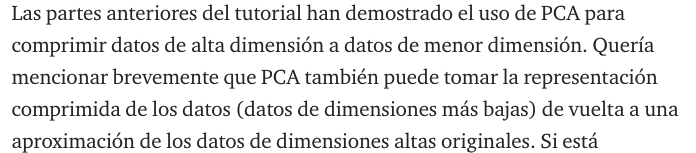